# Create modelling function

In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.style.use('seaborn')

def train_logistics_model(size):
    # Create features and target data
    X = np.random.normal(size=size).reshape(size, 1)
    y = np.vectorize(generate_data)(X).reshape(size, 1)
    
    # Create model
    model = LogisticRegression()
    model.fit(X, y.ravel())
    predictions = model.predict(X)
    
    # Print results
    print('Coefficient: ', model.coef_)
    print('Intercept: ', model.intercept_)
    print('Accuracy', accuracy_score(y, predictions))

    # Plot histogram
    plt.hist(X, bins=20, alpha=0.5)
    plt.show()

    # Plot logistics function based on model coefficient & intercepts
    x = np.linspace(-5, 5, 500)
    loss = compute_prediction(model, x).ravel()
    plt.plot(x, loss, color='red')

    # Plot horizontal and vertical lines for cutoff
    cutting_point = (-1, compute_prediction(model, -1))
    plt.vlines(cutting_point[0], -0.1, cutting_point[1], linestyle="dashed")
    plt.hlines(cutting_point[1], -6, cutting_point[0], linestyle="dashed")

    # Configure axes limits and labels
    plt.xlim((-5.5, 5.5))
    plt.ylim((-0.1, 1.1))
    plt.xticks((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5))
    plt.yticks((0, 0.25, 0.5, 0.75, 1))
    plt.show()

def generate_data(x):
    if x <= -1: 
        return 0
    else:
        return 1
        
def logistics(x): 
    return 1 / (1 + np.exp(-x))
    
def compute_prediction(model, x):
    return logistics(x * model.coef_ + model.intercept_)

# Logistic Regression with size 1,000

Coefficient:  [[ 5.63189442]]
Intercept:  [ 5.89790557]
Accuracy 0.991


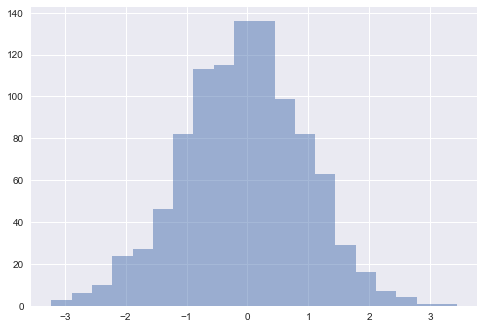

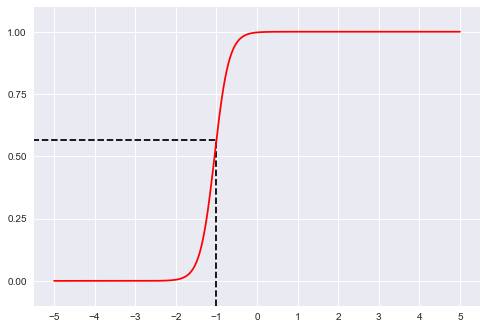

In [2]:
train_logistics_model(1000)

# Logistic Regression with size 10,000

Coefficient:  [[ 12.70330137]]
Intercept:  [ 12.73869771]
Accuracy 0.9991


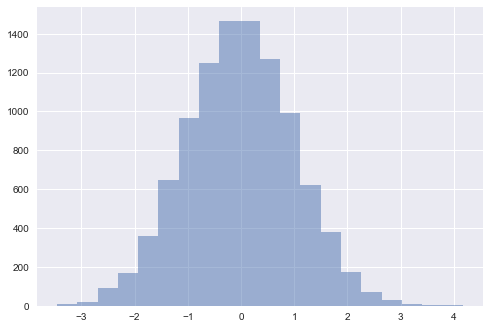

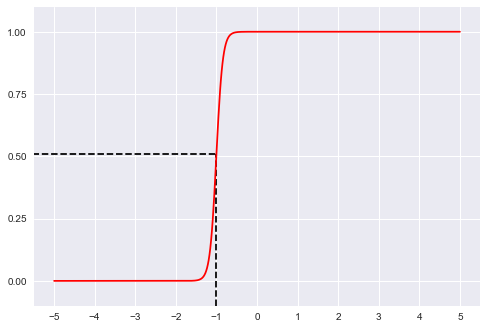

In [3]:
train_logistics_model(10000)

# Logistic Regression with size 100,000

Coefficient:  [[ 26.99204082]]
Intercept:  [ 26.96996304]
Accuracy 0.99981


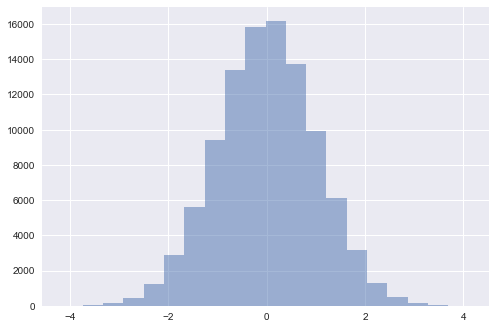

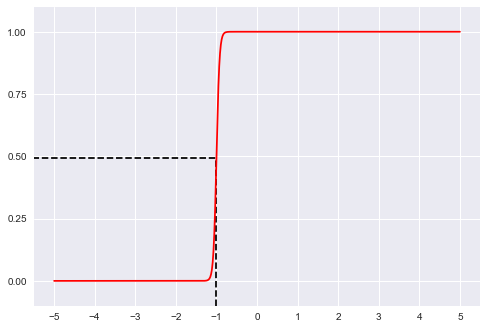

In [4]:
train_logistics_model(100000)